# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart diesease based on their medical attributes

We are going to take following approach

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Definition

In a statement:

Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## Data

The original data came from the [UCI Machine Learning Repository (Cleaveland)](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). There is also a version of it available on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).

## Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll persure the project

## Features

This is where you'll get different information about each of the features in your data

Only 14 attributes used from the original data:

1. Attribute No. 3 (age)
2. Attribute No. 4 (sex)
3. Attribute No. 9 (cp)
4. Attribute No. 10 (trestbps)
5. Attribute No. 12 (chol)
6. Attribute No. 16 (fbs)
7. Attribute No. 19 (restecg)
8. Attribute No. 32 (thalach)
9. Attribute No. 38 (exang)
10. Attribute  No. 40 (oldpeak)
11. Attribute No. 41 (slope)
12. Attribute No. 44 (ca)
13. Attribute No. 51 (thal)
14. Attribute No. 58 (num) the predicted attribute AKA `target`


Attribute documentation:

1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type
    * **Value 0: typical angina - *AKA* angina pectoris**, the discomfort that is noted when the heart does **not get enough blood or oxygen**.
    * **Value 1: atypical angina**, pain complaint is actually *angina pectoris*, though not conforming in every way to the expected or classic description
    * **Value 2: non-anginal pain *AKA* Non-cardiac chest pain** the term that is used to describe pain in the chest that is **not caused by heart disease or a heart attack**.
    * **Value 3: asymptomatic angina *AKA* silent ischemia** - a condition in which an **inadequate supply of oxygen-rich blood to the heart does not cause symptoms such as chest pain**.
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing

### Preparing the tools

We are going to use and import pandas, matplotlib, and numpy for data analysis and manipulation


In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas.plotting import scatter_matrix

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
df = pd.read_csv("./data/heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (***EDA***)

The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with

1. What question(s) are you tring to solve?
2. What kind of data do we have and how to do we different types?
3. What's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let find put many of each class there are:

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

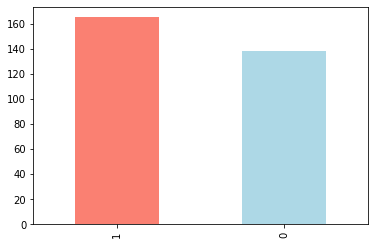

In [6]:
df.target.value_counts().plot(kind='bar', color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


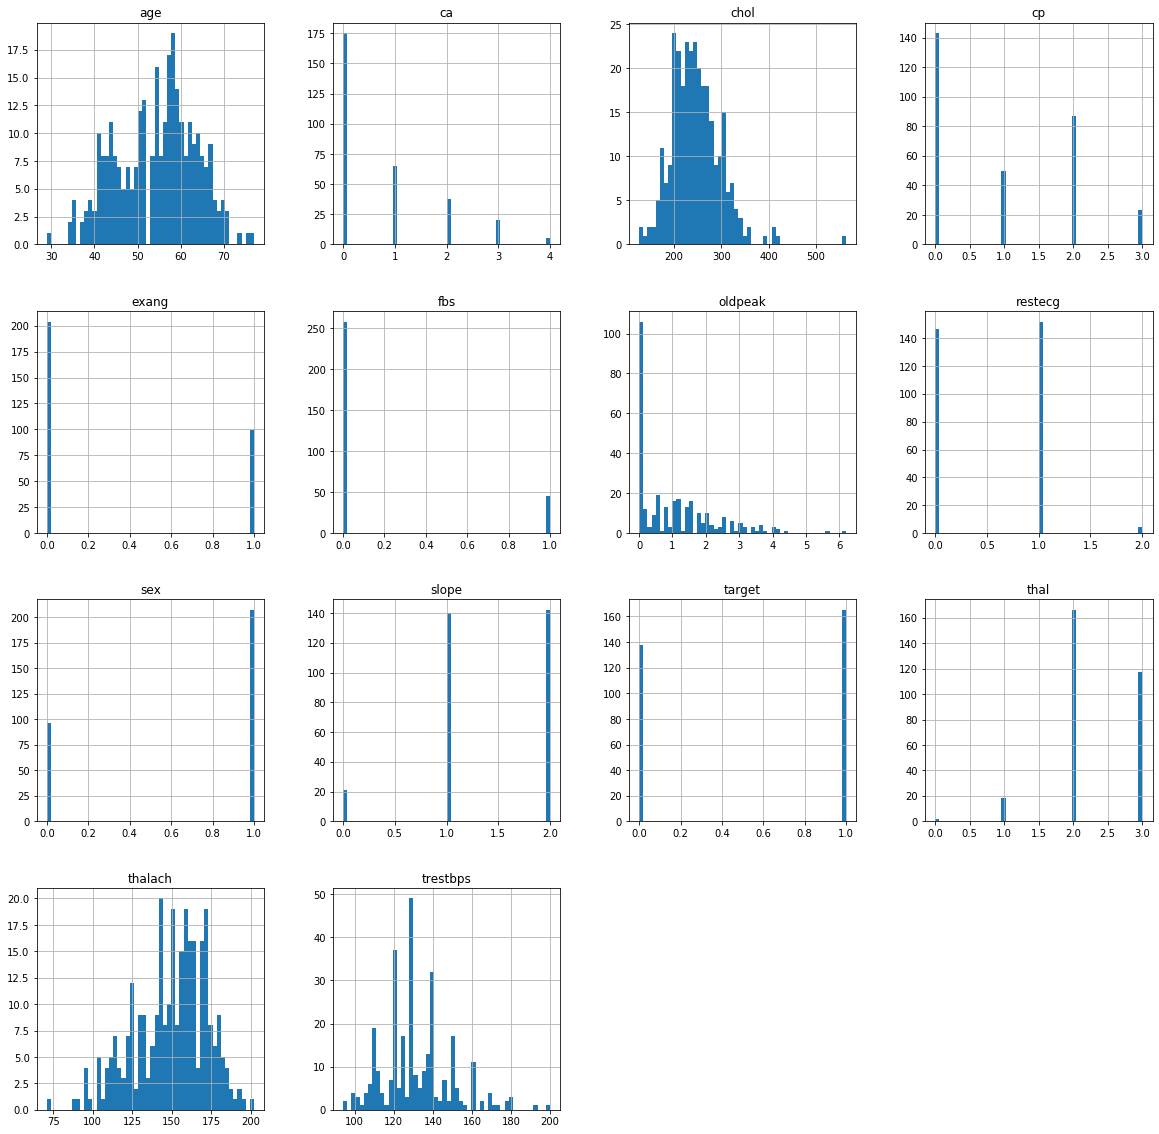

In [10]:
df.hist(bins=50, figsize=(20, 20));

#### Heart Disease Frquency According to Sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target colum with sex column
pd.crosstab(df.target, df.sex)[:]

sex,0,1
target,,
0,24,114
1,72,93


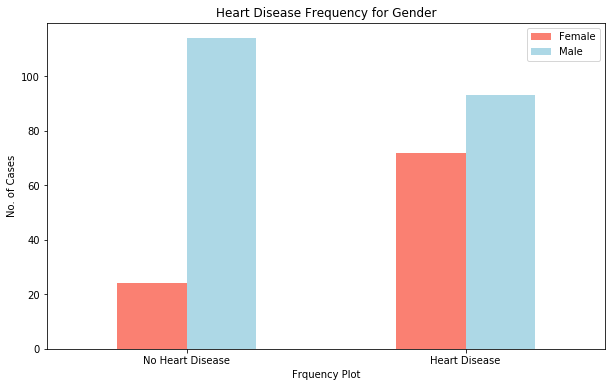

In [13]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', 
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue']);
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("Frquency Plot")
# plt.xticks(["Heart Disease", "No Heart Disease"])
plt.ylabel("No. of Cases")
plt.legend(["Female", "Male"])
# plt.xticks(rotation=0);
plt.xticks(ticks=[0, 1], labels=["No Heart Disease", "Heart Disease"], rotation=0);


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Age vs. Heart Rate for Heart Disease

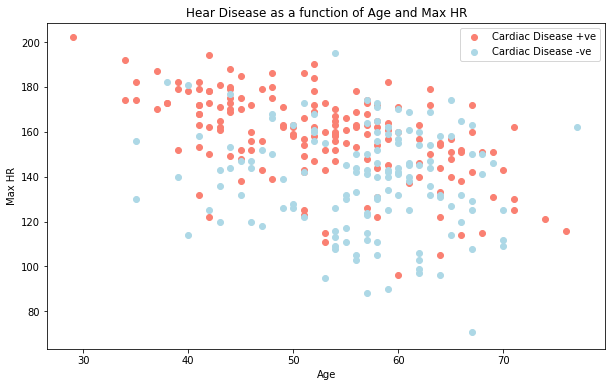

In [15]:
plt.figure(figsize=(10, 6))


# Scatter with disease positive examples
plt.scatter(df["age"][df["target"]==1],
            df["thalach"][df["target"]==1],
            c="salmon")

# Scatter with disease negative examples
plt.scatter(df["age"][df["target"]==0], 
            df["thalach"][df["target"]==0], 
            c="lightblue");


# Add info
plt.title("Hear Disease as a function of Age and Max HR")
plt.xlabel("Age")
plt.ylabel("Max HR")
plt.legend(["Cardiac Disease +ve", "Cardiac Disease -ve"]);

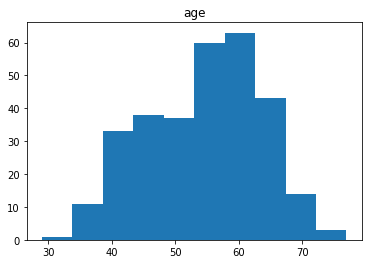

In [16]:
df.hist("age");
plt.grid(False)

#### Heart Disease Frequency per Chest Pain

cp: chest pain type

* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


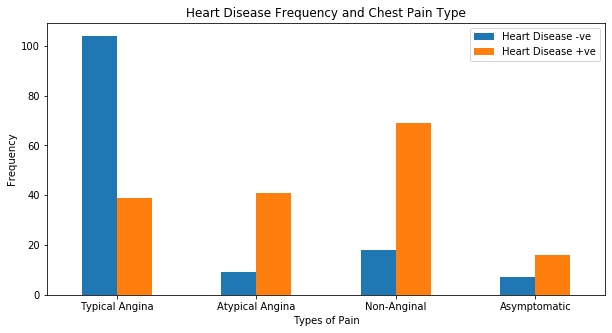

In [18]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 5))
plt.ylabel("Frequency")
plt.title("Heart Disease Frequency and Chest Pain Type")
plt.xlabel("Types of Pain")
plt.legend(["Heart Disease -ve", "Heart Disease +ve"])
plt.xticks(ticks=[0, 1, 2, 3], labels=["Typical Angina", "Atypical Angina", "Non-Anginal", "Asymptomatic"], rotation=0);

In [19]:
# Make correlation matrix
target_corr = pd.DataFrame(df.corr().drop("target", axis=0).target)
target_corr

,target
age,-0.225439
sex,-0.280937
cp,0.433798
trestbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230
thalach,0.421741
exang,-0.436757
oldpeak,-0.430696


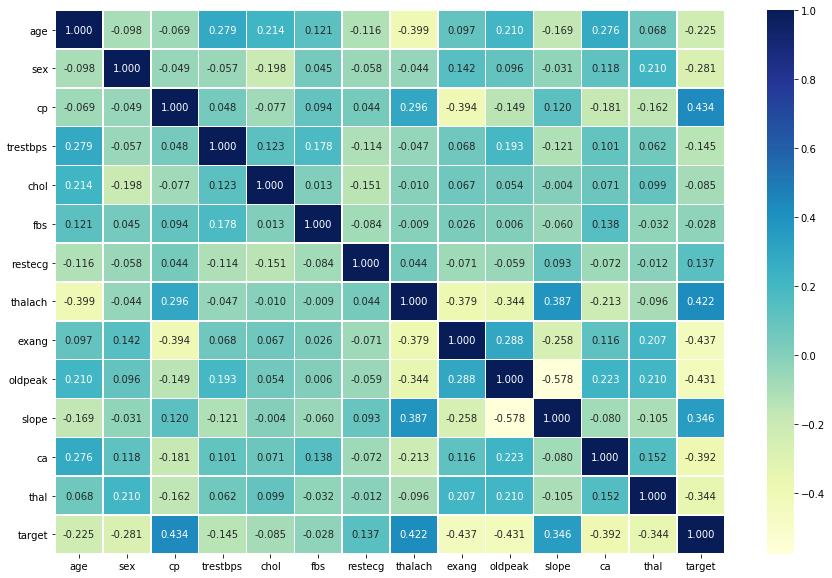

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap((corr_matrix),
                 annot=True,
                 linewidths=0.5,
                 fmt=".3f",
                 cmap="YlGnBu");

## Modelling 

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = df.drop("target", axis=1)
y = df["target"]

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# split data into train and test set

np.random.seed(42)

# Split into test train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

<hr>
Now we've got out data into training and testing sets, it's time to build a machine learning model.

We'll train it, so it finds the pattern on trianing set and we'll test it so it uses the previously learned patterns to predict outcomes which will then be compared with actual outcomes.

We are going to test three different models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [28]:
# Put models in a dictionary

models = {
    "LR": LogisticRegression(max_iter=1500),
    "KNN": KNeighborsClassifier(),
    "RFC": RandomForestClassifier(),
}

# Creat a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test, randomness=42):
    '''
    Fits and evaluate given machine models.
    
    models: A dictionary of different Scikit-Learn models classification models.
    
    X_train: Training Data
    X_test: Testing Data
    
    y_train: Training Labels 
    y_test: Training Labels
    
    randomness: Random seed value. default is 42
    '''
    # Set Random Seed
    np.random.seed(randomness)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model score and append it the model_score dictionary
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores
    

In [29]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'LR': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

## Model Comparison

In [30]:
model_compare = (pd.DataFrame(model_scores, index=["accuracy"])).T
model_compare

,accuracy
LR,0.885246
KNN,0.688525
RFC,0.836066


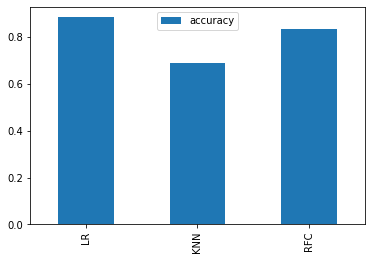

In [31]:
model_compare.plot(kind='bar');

Now we've go a baseline model. Now What...?

Lets look at the following:

* Hyperparameter Tuning
* Feature Importance 
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter Tuning by Hand

In [32]:
# Lets tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)
knn = KNeighborsClassifier()

# Loop through neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [33]:
 train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximumn KNN score on the test data: 75.41%


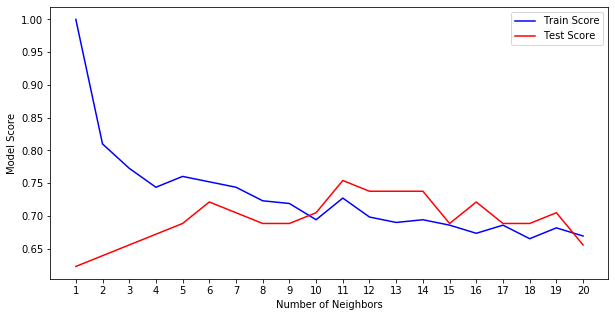

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))

train = ax.plot(neighbors, train_scores, c='b', label="Train Score");
test = ax.plot(neighbors, test_scores, c='r', label="Test Score")
ax.legend();
ax.set_xticks(np.arange(1, 21, 1))
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Model Score");
print(f"Maximumn KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with `RandomizedSearchCV`

We are going to tune
* logistic regression model and
* random forest classifier 

...using `RandomizedSearchCV`

In [36]:
# Create a hyperparameter grid for logistic regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
}

# Create Hyperparameter grid for random forest classifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

Now we've got hypterparmeter grids setup fpr each model, lets use them to figure out the best hyperparameter combinations using `RandomizedSearchCV`...

In [37]:
# Logistic Regression

np.random.seed(42)

# Setup Random Hyperparameter search of LR

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter model for logistoc regression
rs_log_reg.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tune logistic regression, let's do the same for random forest classifier

In [40]:
# Setup Random Seed
np.random.seed(42)

# Setup random hyperparameter search for RandomizedSeachCV
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit the search model
rs_rf.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [41]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [42]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning using `GridSearchCV`

Since the logistic regression model provides the best score so far, we'll try to improve them again by using `GridSearchCV`

In [43]:
# Hyperparamter Grid for Logistic Regression

log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ['liblinear'],
    "penalty": ['l1', 'l2']
}

# Setup grid search
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit the grid
gs_log_reg.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [44]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [45]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [46]:
gs_log_reg.best_score_

0.8446994535519124

## Evaluating Machine Learning Classifier with Tuned Hyperparameter

Beyond `accuracy` we have following options:

* ROC curve and AUC score,
* Confusion matrix,
* Classification report,
* Precision,
* Recall, and
* F1 score

...use of cross validation is preferred where ever possible.

In [47]:
y_preds = gs_log_reg.predict(X_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

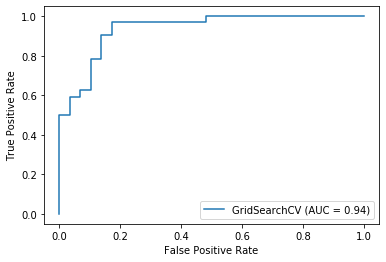

In [49]:
# Plot ROC curve and calculate AUC score

plot_roc_curve(gs_log_reg, X_test, y_test);


In [50]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


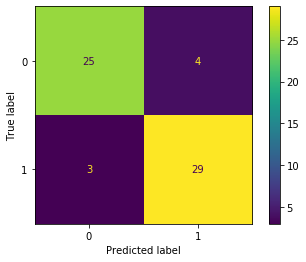

In [51]:
from sklearn.metrics import plot_confusion_matrix

# Confusion Matrix plot with sklearn metrics
plot_confusion_matrix(gs_log_reg, X_test, y_test)

In [52]:
# Confusion Matrix with sns

# sns.set(font_scale==1.5)

# sns.set(font_scale=1.5)

def sns_con_mat_plot (y_test, y_pred):
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    ax.set_xlabel("True Label")
    ax.set_ylabel("Predicted Label")

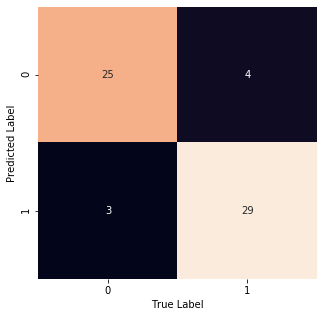

In [53]:
sns_con_mat_plot(y_test, y_preds)

Now we've got a ROC curve, and AUC score and a confusion matrix. Now let's get the classification report and cross validated precision, recall and f1-score

In [54]:
# print("Classification report on training data:")
# print(classification_report(y_train, gs_log_reg.predict(X_train)))
# print("<- ----------------------------------------------------------- ->\n")
print("Classification report on testing data:")
print(classification_report(y_test, y_preds))

Classification report on testing data:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation Metrics using Cross-Validation

We're going to calculate cross-validated accuracy, precision, recall and f1-score using `cross_val_score`

In [55]:
# check best hyperparameters
params = gs_log_reg.best_params_
params

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [56]:
clf = LogisticRegression(C=params['C'],
                         penalty=params['penalty'],
                         solver=params['solver'])

**We don't need to fit the newly instantiated model. This is because the function `cross_val_score` fits and and score the data for each round of cross validation**

In [57]:
cv_acc = cross_val_score(clf, X, y, cv=5, 
                         scoring='accuracy').mean()
cv_prec = cross_val_score(clf, X, y, cv=5, 
                          scoring='precision').mean()
cv_rec = cross_val_score(clf, X, y, cv=5, 
                         scoring='recall').mean()
cv_f1 = cross_val_score(clf, X, y, cv=5, 
                        scoring='f1').mean()

cv_acc, cv_prec, cv_rec, cv_f1

(0.8446994535519124,
 0.8207936507936507,
 0.9212121212121213,
 0.8673007976269721)

In [58]:
# Visualize the cross-validated metrics

cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_prec,
    "Recall": cv_rec,
    "F1 Score": cv_f1
}, 
                          index=['Score']).T

cv_metrics

,Score
Accuracy,0.844699
Precision,0.820794
Recall,0.921212
F1 Score,0.867301


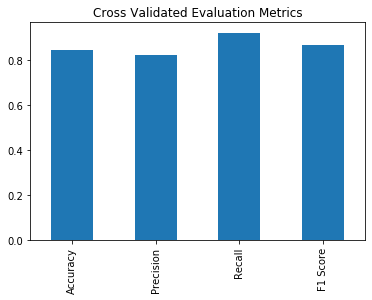

In [59]:
cv_metrics.plot.bar(title='Cross Validated Evaluation Metrics', 
                    legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how do they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "`(MODEL NAME) feature importance`"

Let's find the feature importance for our `LogisticRegression` model.

In [60]:
# Fit an instance of LogisticRegression

params = gs_log_reg.best_params_
params

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [61]:
clf = LogisticRegression(C=params['C'],
                         penalty=params['penalty'],
                         solver=params['solver']
                        )

clf.fit(X_train, y_train);

For `LogisticRegression` feature importance can be evaluated using `clf.coef_` method. The result from this method can be combined with DataFrame column names into a dictionary using the `zip` method. Finally, the newly formed dictionary can be used to plot a bar chart to visualize the importance of each feature.

> * Positive values of `clf.coef_` denotes contribution towards `target = 1`. Higher magnitude means higher importance
>
> * Negative values of `clf.coef_` denotes contribution towards `target = 0`. Higher magnitude means higher importance

Number of features: 13


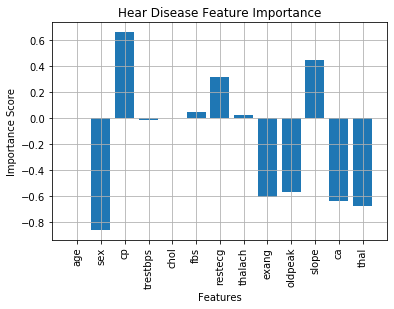

In [62]:
imp_coef = clf.coef_[0]
print(f"Number of features: {len(imp_coef)}")

feature_dict = dict(zip(df.columns, list(imp_coef)))

plt.bar(feature_dict.keys(), feature_dict.values());
plt.title("Hear Disease Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid(True)

plt.xticks(rotation=90);


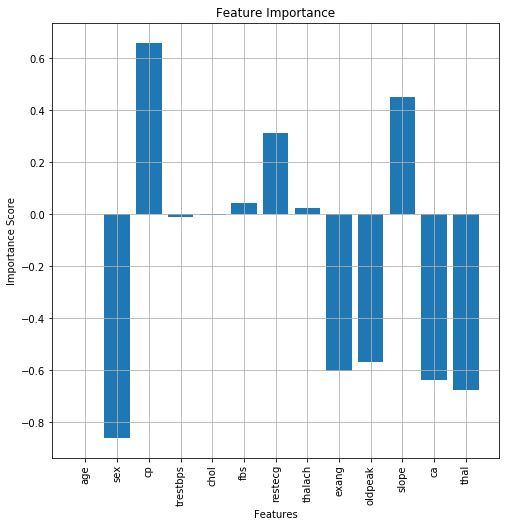

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(feature_dict.keys(), feature_dict.values())
ax.set_ylabel("Importance Score")
ax.set_xlabel("Features")
ax.set_title("Feature Importance")
# ax.set_xticks(xlabels_positions)
ax.set_xticklabels(labels=feature_dict.keys(), rotation=90)


ax.grid(True)


## Experimentation

If you haven't hit the evaluation metrics yet...

* Is it possible to collect more data?
* Can the model be improved any further?
* Use an alternative better model? e.g. `CatBoost` or `XGBoost`?


## Next Steps...

If the model has passed the pre-set evaluation metric, then how would you export the trained model and share it with others?